In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']  #MacOS
# plt.rcParams['font.sans-serif']=['SimHei'] #Windows
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

In [2]:
scores = np.random.randint(50, 101, (5, 3))
names = ('关羽', '张飞', '赵云', '马超', '黄忠')
courses = ('语文', '数学', '英语')
df_score = pd.DataFrame(data=scores, columns=courses, index=names)

### TOPN

In [3]:
# 获取按语文成绩排名的前三名
df_score.nlargest(3,'语文')

,语文,数学,英语
赵云,96,75,58
马超,89,80,77
关羽,77,61,66


In [4]:
# 获取按数学成绩排名的后三名
df_score.nsmallest(3,'数学')

,语文,数学,英语
关羽,77,61,66
赵云,96,75,58
黄忠,74,75,65


In [5]:
# 按学科获取平均成绩
df_score.mean()

语文    82.6
数学    78.0
英语    71.8
dtype: float64

In [6]:
# 按学生获取平均成绩
df_score.mean(axis=1)

关羽    68.000000
张飞    89.666667
赵云    76.333333
马超    82.000000
黄忠    71.333333
dtype: float64

In [7]:
# data = [['2020-01-01', '上海', '拼多多', '182894-455', '八匹马', 99, 10],
#         ['2020-01-01', '北京', '淘宝', '205635-402', '八匹马', 219, 20],
#         ['2020-01-01', '上海', '天猫', '377781-010', None, 500, 25]]
# columns = ['销售日期', '销售区域', '销售渠道', '销售订单', '品牌', '售价', '销售数量']
# df_sale = pd.DataFrame(data=data, columns=columns)
df_sale = pd.read_excel(io ='res/2020年销售数据.xlsx')
print(df_sale.info())
df_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    1945 non-null   datetime64[ns]
 1   销售区域    1945 non-null   object        
 2   销售渠道    1945 non-null   object        
 3   销售订单    1945 non-null   object        
 4   品牌      1945 non-null   object        
 5   售价      1945 non-null   int64         
 6   销售数量    1945 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 106.5+ KB
None


,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61


### 通过计算添加新的一列

In [9]:
df_sale['销售额']=df_sale.售价 * df_sale.销售数量
df_sale.head()

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189


### groupby()方法进行分组
note: 如果列仅为一个的话,此方法获得的是一个Series对象

In [22]:
df_sale.groupby('销售渠道').销售额.sum().sort_values(ascending=False)

销售渠道
天猫     13698903
拼多多     8447392
京东      7694468
实体      5148419
抖音      4782905
Name: 销售额, dtype: int64


### 获取不同销售区域,不同销售渠道的销售额的总值和均值

In [26]:
a= df_sale.groupby(['销售区域','销售渠道']).销售额.agg(['sum','mean'])
a.sort_values(by='mean',ascending=False)


sum          mean
销售区域 销售渠道                       
江苏   抖音      88327  44163.500000
广东   拼多多    350228  38914.222222
     抖音     147477  36869.250000
浙江   天猫     360950  32813.636364
江苏   实体      63845  31922.500000
浙江   京东     157283  31456.600000
安徽   实体     124288  31072.000000
广东   天猫     771932  30877.280000
安徽   抖音      90157  30052.333333
     天猫     415569  29683.500000
广东   实体     116205  29051.250000
     京东     232107  29013.375000
江苏   天猫     226867  28358.375000
南京   抖音     198184  28312.000000
     实体     252383  28042.555556
江苏   京东      83837  27945.666667
     拼多多     74203  24734.333333
浙江   拼多多    123264  24652.800000
南京   拼多多    296121  22778.538462
北京   抖音    1681974  22729.378378
上海   实体    1545411  21766.352113
     拼多多   2552666  21272.216667
     京东    2496713  21158.584746
南京   天猫     714564  21016.588235
北京   实体    1718535  20957.743902
     拼多多   2614671  20917.368000
安徽   拼多多    145714  20816.285714
福建   拼多多   2290525  20635.360360
上海   抖音    1415208  20510.260870
安徽   京东     119735  19955.833333
上海   天猫    3600491  19462.113514
北京   天猫    4150172  19213.759259
南京   京东     306049  19128.062500
福建   实体    1298787  19099.808824
北京   京东    2312365  18799.715447
福建   天猫    3458358  17918.953368
     京东    1986379  17578.575221
     抖音    1144178  16115.183099
浙江   实体      28965  14482.500000
     抖音      17400   8700.000000

In [28]:
df_sale.groupby('销售区域').销售额.agg(销售总额='sum', 单笔最高='max', 单笔最低='min')

,销售总额,单笔最高,单笔最低
销售区域,,,
上海,11610489,116303,948
北京,12477717,133411,690
南京,1767301,87527,1089
安徽,895463,68502,1683
广东,1617949,120807,990
江苏,537079,114312,3383
浙江,687862,90909,3927
福建,10178227,87527,897


## 透视表
透视表的本质就是对数据进行分组聚合操作，根据 A 列对 B 列进行统计，例如，我们要“统计每个销售区域的销售总额”，那么“销售区域”就是我们的 A 列，而“销售额”就是我们的 B 列，在pivot_table函数中分别对应index和values参数，这两个参数都可以是单个列或者多个列.

In [29]:
pd.pivot_table(df_sale, index=['销售区域', df_sale['销售日期'].dt.month], values='销售额', aggfunc='sum')

销售额
销售区域 销售日期         
上海   1     1679125
     2     1689527
     3     1061193
     4     1082187
     5      841199
     6      785404
     7      863906
     8      734937
     9     1107693
     10     412108
     11     825169
     12     528041
北京   1     1878234
     2     1807787
     3     1360666
     4     1205989
     5      807300
     6     1216432
     7     1219083
     8      645727
     9      390077
     10     671608
     11     678668
     12     596146
南京   7      841032
     10     710962
     12     215307
安徽   4      341308
     5      554155
广东   3      388180
     8      469390
     9      365191
     11     395188
江苏   4      537079
浙江   3      248354
     8      439508
福建   1     1852496
     2     1111141
     3     1106579
     4      830207
     5     1036351
     6      816100
     7      577283
     8      658627
     9      769999
     10     580707
     11     486258
     12     352479

groupby操作后，如果对单个列进行聚合，得到的结果是一个Series对象，而上面的结果是一个DataFrame 对象.

In [30]:
pd.pivot_table(
    df_sale, index='销售区域', columns=df_sale['销售日期'].dt.month,
    values='销售额', aggfunc='sum', fill_value=0
)

销售日期,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,0,0,0,0,0,0
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


### 使用margins和margins_name对聚合做汇总

In [31]:
df_sale['月份']=df_sale['销售日期'].dt.month
pd.pivot_table(
    df_sale,index=['销售区域'],columns='月份',
    values='销售额',aggfunc = 'sum', fill_value = 0,
    margins =True,margins_name='总计1'
)

月份,1,2,3,4,5,6,7,8,9,10,11,12,总计1
销售区域,,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041,11610489
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146,12477717
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307,1767301
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0,895463
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0,1617949
江苏,0,0,0,537079,0,0,0,0,0,0,0,0,537079
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0,687862
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479,10178227
总计1,5409855,4608455,4164972,3996770,3239005,2817936,3501304,2948189,2632960,2375385,2385283,1691973,39772087


## 交叉表
交叉表是一种特殊的透视表,不需要提前构造DataFrame对象,而是直接通过数组或者Series对象指定两个或多个因素进行运算的统计结果.
Exmaple:
    统计每个区域的销售总额,可以按照如下的方式来完成

In [34]:
# 准备三组数据,每个数据都是一个Series对象
sales_area, sales_month, sales_amount = df_sale['销售区域'], df_sale['月份'], df_sale['销售额']

In [45]:
# 使用crosstab产生交叉表
ct = pd.crosstab(
    index=sales_area,
    columns=sales_month,
    values=sales_amount,
    aggfunc='sum',
)
ct.fillna(.0, inplace=True)  # 填充空值
ct = ct.applymap(int)  # 修改为整形
ct

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,0,0,0,0,0,0
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


## 数据可视化
通过图表的方式将数据呈现出来

In [ ]:
temp = pd.pivot_table(df_sale,
                      index='销售区域',
                      values='销售额',
                      aggfunc='sum')
temp.plot(figsize=(8,4),kind='bar')
plt.xticks(rotation=0)
plt.title('不同地区销售额分布')


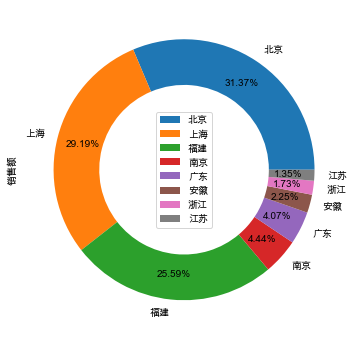

In [60]:
temp.sort_values(by='销售额', ascending=False).plot(
    figsize=(6, 6), kind='pie', y='销售额',
    autopct='%.2f%%', pctdistance=0.8,
    wedgeprops=dict(linewidth=1, width=0.35)
)

plt.legend(loc='center')